In [77]:
np.random.seed(42)
%matplotlib inline
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

In [89]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    # cwd = os.getcwd() + "images"
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    # mode = "a" if os.path.exists(path) else "w"
    print("saving figure", fig_id)
    # 新建目录 不然也会报错
    # 新建png文件 不然找不到该文件会报错 chapter_id 手动创建
    if not os.path.isdir(os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)):
        os.makedirs(os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID))
    if not os.path.exists(path):
        with open(path, 'w'):
            pass
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format="png", dpi=300)
    
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## 案例1

In [4]:
datapath = os.path.join("datasets", "lifesat", "")

In [5]:
oecd_bli = pd.read_csv(datapath+"oecd_bli_2015.csv", thousands=',')

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',',delimiter='\t', encoding="latin1", na_values="n/a")

#### np.c_ pd.merge扫盲

In [6]:
# left_on right_on: label or list, or array-like, 指定拼接的两个column
# default value_x/y 也可以指定suffixes=('_left', '_right')
# if 指定 suffixes=(False, False) 在指定列有重合的情况下 会报错
# left_index 即指定用左边的index作为拼接的基准

df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],'value': [5, 6, 7, 8]})
df1.merge(df2, left_on='lkey', right_on='rkey')
# np.c_[df1['value']]#.shape


,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


In [7]:
def prepare_country_data(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_data = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
    full_country_data.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    
    return full_country_data[["GDP per capita", "Life satisfaction"]].iloc[keep_indices]


In [8]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", "c"]].iloc[keep_indices]

In [14]:
country_stats = prepare_country_data(oecd_bli, gdp_per_capita) # run后oecd变了 自然找不到Country列了 cuz变index了 所以最好把data放后面
country_stats

,GDP per capita,Life satisfaction
Country,,
Mexico,9009.280,6.6
Russia,9054.914,6.0
Turkey,9437.372,5.5
Hungary,12239.894,5.3
Chile,13340.905,6.7
Slovak Republic,15991.736,6.1
Czech Republic,17256.918,6.6
Estonia,17288.083,5.6
Greece,18064.288,5.2


In [15]:
from sklearn import linear_model
X = np.c_[country_stats["GDP per capita"]]
Y = np.c_[country_stats["Life satisfaction"]]
model = linear_model.LinearRegression()
model.fit(X, Y)
print(model.predict([[22300]]))

[[6.17314358]]


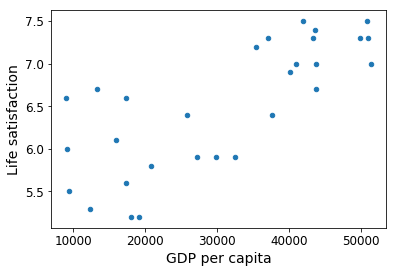

In [16]:
country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction")
plt.show()

#### 一些图

In [22]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=",")
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli["Life satisfaction"].head()

Country
Australia    7.3
Austria      7.0
Belgium      6.9
Brazil       6.6
Canada       7.3
Name: Life satisfaction, dtype: float64

In [35]:
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", thousands=",", delimiter="\t", encoding="latin1", na_values="n/a")

In [36]:
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [37]:
full_country_stat = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stat.sort_values(by="GDP per capita", inplace=True)
full_country_stat.head()

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
South Africa,22.0,37.0,43.0,18.68,43.0,36.1,10.0,10872.0,17042.0,18.0,...,14.73,73.0,69.0,15.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",5694.572,2014.0
Brazil,10.0,6.7,49.0,7.15,64.0,37.3,27.6,12227.0,7102.0,20.0,...,14.45,79.0,72.0,15.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,16.0,4.2,37.0,29.48,61.0,45.9,17.9,13891.0,4750.0,21.0,...,12.74,63.0,67.0,14.8,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,13.8,95.0,0.16,70.0,52.2,11.3,16657.0,2260.0,19.0,...,14.90,65.0,54.0,16.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,20.0,6.5,39.0,33.77,51.0,60.6,1.7,17067.0,4429.0,20.0,...,12.59,85.0,63.0,17.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0


In [38]:
full_country_stat[["GDP per capita", "Life satisfaction"]].loc["United States"]

GDP per capita       55805.204
Life satisfaction        6.900
Name: United States, dtype: float64

In [43]:
full_country_stat

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
South Africa,22.0,37.0,43.0,18.68,43.0,36.1,10.0,10872.0,17042.0,18.0,...,14.73,73.0,69.0,15.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",5694.572,2014.0
Brazil,10.0,6.7,49.0,7.15,64.0,37.3,27.6,12227.0,7102.0,20.0,...,14.45,79.0,72.0,15.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,16.0,4.2,37.0,29.48,61.0,45.9,17.9,13891.0,4750.0,21.0,...,12.74,63.0,67.0,14.8,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,13.8,95.0,0.16,70.0,52.2,11.3,16657.0,2260.0,19.0,...,14.90,65.0,54.0,16.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,20.0,6.5,39.0,33.77,51.0,60.6,1.7,17067.0,4429.0,20.0,...,12.59,85.0,63.0,17.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,19.0,4.3,83.0,3.05,67.0,50.7,1.2,16821.0,23289.0,18.0,...,15.06,62.0,76.0,16.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,22.0,2.7,91.0,6.68,65.0,66.3,0.8,18906.0,14997.0,23.0,...,14.42,55.0,80.0,17.7,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,16.0,9.4,65.0,10.06,62.0,51.1,4.5,16588.0,21409.0,18.0,...,14.90,49.0,69.0,17.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Latvia,11.0,12.9,89.0,2.09,69.0,60.7,6.6,15269.0,17105.0,23.0,...,13.83,59.0,77.0,17.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13618.569,2015.0


In [41]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stat[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stat[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

saving figure money_happy_scatterplot


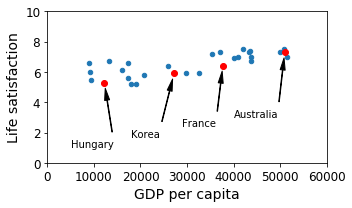

In [103]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    # "United States": (52000, 3.8),
    }

for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    # country = "U.S." if country == "United States" else country 不知道问什么会报错
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
save_fig('money_happy_scatterplot')
plt.show()

#position_text.items()

saving figure tweaking_model_params_plot


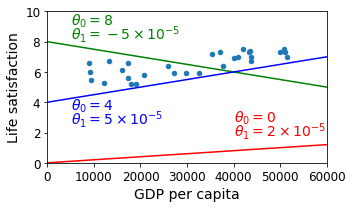

In [112]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")
plt.plot(X, 4 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")
save_fig('tweaking_model_params_plot')
plt.show()

In [115]:
type(sample_data["GDP per capita"])
type(np.c_[sample_data["GDP per capita"]])

numpy.ndarray

In [116]:
from sklearn import linear_model

In [117]:
X = np.c_[sample_data["GDP per capita"]]
Y = np.c_[sample_data["Life satisfaction"]]
model = linear_model.LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [118]:
t0, t1 = model.intercept_[0], model.coef_[0][0]
t0, t1

(5.295521405997438, 3.935525462329291e-05)

saving figure best fit model plot


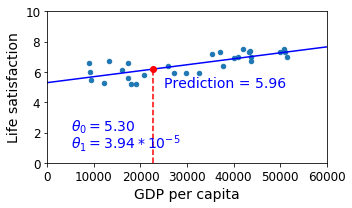

In [129]:
sample_data.plot(kind="scatter", x="GDP per capita", y="Life satisfaction", figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X_value = np.linspace(0, 60000, 1000)
plt.plot(X_value, t0 + t1 * X_value, "b")
plt.text(5000, 2.1, r"$\theta_0 = 5.30$", fontsize=14, color="b")
plt.text(5000, 1.0, r"$\theta_1 = 3.94 * 10^{-5}$", fontsize=14, color="b")

cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
cyprus_predicted_life_satisfaction = model.predict([[cyprus_gdp_per_capita]])[0][0]

plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Prediction = 5.96", fontsize=14, color="b")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")

save_fig("best fit model plot")
plt.show()